In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Telecom_customer_churn.csv')
data.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     10

# **Data Preprocessing**

In [4]:
data.isna().sum()

rev_Mean        357
mou_Mean        357
totmrc_Mean     357
da_Mean         357
ovrmou_Mean     357
               ... 
kid11_15       1732
kid16_17       1732
creditcd       1732
eqpdays           1
Customer_ID       0
Length: 100, dtype: int64

In [5]:
columns_to_drop = []
for elem in data.columns:
  if data[elem].isnull().sum() >= 0.1*len(data):
    columns_to_drop.append(elem)

columns_to_drop

['hnd_webcap',
 'ownrent',
 'lor',
 'dwlltype',
 'adults',
 'infobase',
 'income',
 'numbcars',
 'HHstatin',
 'dwllsize']

In [6]:
data = data.drop(columns=columns_to_drop)
data.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005


In [7]:
data = data.drop(columns='Customer_ID')
data.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,marital,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,S,0.0,N,U,U,U,U,U,Y,361.0
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,S,0.0,Z,U,U,U,U,U,Y,240.0
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,M,0.0,N,U,Y,U,U,U,Y,1504.0
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,M,0.0,U,Y,U,U,U,U,Y,1812.0
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,S,0.0,I,U,U,U,U,U,Y,434.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 89 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     100

In [9]:
y = data[['churn']]
y.head()

,churn
0,1
1,0
2,1
3,0
4,0


In [10]:
preds = data.drop(columns=['churn'])
preds.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,marital,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,S,0.0,N,U,U,U,U,U,Y,361.0
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,S,0.0,Z,U,U,U,U,U,Y,240.0
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,M,0.0,N,U,Y,U,U,U,Y,1504.0
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,M,0.0,U,Y,U,U,U,U,Y,1812.0
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,S,0.0,I,U,U,U,U,U,Y,434.0


In [11]:
cat_vars = []
for elem in preds.columns:
  if preds[elem].dtype == 'object':
    cat_vars.append(elem)

cat_vars

['new_cell',
 'crclscod',
 'asl_flag',
 'prizm_social_one',
 'area',
 'dualband',
 'refurb_new',
 'marital',
 'ethnic',
 'kid0_2',
 'kid3_5',
 'kid6_10',
 'kid11_15',
 'kid16_17',
 'creditcd']

In [12]:
cat_vars_df = data[cat_vars]
cat_vars_df.head()

,new_cell,crclscod,asl_flag,prizm_social_one,area,dualband,refurb_new,marital,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd
0,U,A,N,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,S,N,U,U,U,U,U,Y
1,N,EA,N,U,CHICAGO AREA,N,N,S,Z,U,U,U,U,U,Y
2,Y,C,N,S,GREAT LAKES AREA,N,N,M,N,U,Y,U,U,U,Y
3,Y,B,N,T,CHICAGO AREA,N,N,M,U,Y,U,U,U,U,Y
4,Y,A,N,U,NEW ENGLAND AREA,Y,N,S,I,U,U,U,U,U,Y


In [13]:
cat_vars_df.isna().sum()

new_cell               0
crclscod               0
asl_flag               0
prizm_social_one    7388
area                  40
dualband               1
refurb_new             1
marital             1732
ethnic              1732
kid0_2              1732
kid3_5              1732
kid6_10             1732
kid11_15            1732
kid16_17            1732
creditcd            1732
dtype: int64

We replace the missing values with the attribute's mode for categorical variables.

In [14]:
cat_vars_df = cat_vars_df.apply(lambda x: x.fillna(x.mode().iat[0]))
cat_vars_df.head()

,new_cell,crclscod,asl_flag,prizm_social_one,area,dualband,refurb_new,marital,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd
0,U,A,N,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,S,N,U,U,U,U,U,Y
1,N,EA,N,U,CHICAGO AREA,N,N,S,Z,U,U,U,U,U,Y
2,Y,C,N,S,GREAT LAKES AREA,N,N,M,N,U,Y,U,U,U,Y
3,Y,B,N,T,CHICAGO AREA,N,N,M,U,Y,U,U,U,U,Y
4,Y,A,N,U,NEW ENGLAND AREA,Y,N,S,I,U,U,U,U,U,Y


In [15]:
cat_vars_df.isna().sum()

new_cell            0
crclscod            0
asl_flag            0
prizm_social_one    0
area                0
dualband            0
refurb_new          0
marital             0
ethnic              0
kid0_2              0
kid3_5              0
kid6_10             0
kid11_15            0
kid16_17            0
creditcd            0
dtype: int64

Since the dataset is not very large, we use label encoding for categorical variables to prevent over-complicating the problem.

In [16]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [17]:
cat_vars_df_encoded = cat_vars_df.apply(lambda col: label_encoder.fit_transform(col))
cat_vars_df_encoded.head()

,new_cell,crclscod,asl_flag,prizm_social_one,area,dualband,refurb_new,marital,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd
0,1,0,0,2,13,3,0,3,9,0,0,0,0,0,1
1,0,21,0,4,3,0,0,3,16,0,0,0,0,0,1
2,2,7,0,2,6,0,0,2,9,0,1,0,0,0,1
3,2,4,0,3,3,0,0,2,14,1,0,0,0,0,1
4,2,0,0,4,10,3,0,3,6,0,0,0,0,0,1


In [18]:
num_vars_df = preds.drop(columns=cat_vars)
num_vars_df.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,truck,rv,forgntvl,eqpdays
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,322.0,136.0,38.0,149.98999,2.0,2.0,0.0,0.0,0.0,361.0
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,477.0,275.0,48.0,NaN,7.0,6.0,1.0,1.0,0.0,240.0
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,11.0,6.0,17.0,29.98999,2.0,1.0,0.0,0.0,0.0,1504.0
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,50.0,25.0,40.0,29.98999,1.0,1.0,0.0,0.0,0.0,1812.0
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,586.0,196.0,80.0,149.98999,6.0,4.0,0.0,0.0,0.0,434.0


In [19]:
num_vars_df.isna().sum()

rev_Mean        357
mou_Mean        357
totmrc_Mean     357
da_Mean         357
ovrmou_Mean     357
               ... 
models            1
truck          1732
rv             1732
forgntvl       1732
eqpdays           1
Length: 73, dtype: int64

We replace the missing values in each column with the median value of that column for numeric variables.

In [20]:
num_vars_df = num_vars_df.apply(lambda x: x.fillna(x.median()))
num_vars_df.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,truck,rv,forgntvl,eqpdays
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,322.0,136.0,38.0,149.98999,2.0,2.0,0.0,0.0,0.0,361.0
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,477.0,275.0,48.0,99.98999,7.0,6.0,1.0,1.0,0.0,240.0
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,11.0,6.0,17.0,29.98999,2.0,1.0,0.0,0.0,0.0,1504.0
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,50.0,25.0,40.0,29.98999,1.0,1.0,0.0,0.0,0.0,1812.0
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,586.0,196.0,80.0,149.98999,6.0,4.0,0.0,0.0,0.0,434.0


In [21]:
num_vars_df.isna().sum()

rev_Mean       0
mou_Mean       0
totmrc_Mean    0
da_Mean        0
ovrmou_Mean    0
              ..
models         0
truck          0
rv             0
forgntvl       0
eqpdays        0
Length: 73, dtype: int64

In [22]:
predictors = pd.concat([num_vars_df, cat_vars_df_encoded], axis=1, join='inner')
predictors.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,dualband,refurb_new,marital,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,3,0,3,9,0,0,0,0,0,1
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0,0,3,16,0,0,0,0,0,1
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0,0,2,9,0,1,0,0,0,1
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0,0,2,14,1,0,0,0,0,1
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,3,0,3,6,0,0,0,0,0,1


In [23]:
predictors.isnull().values.any()

False

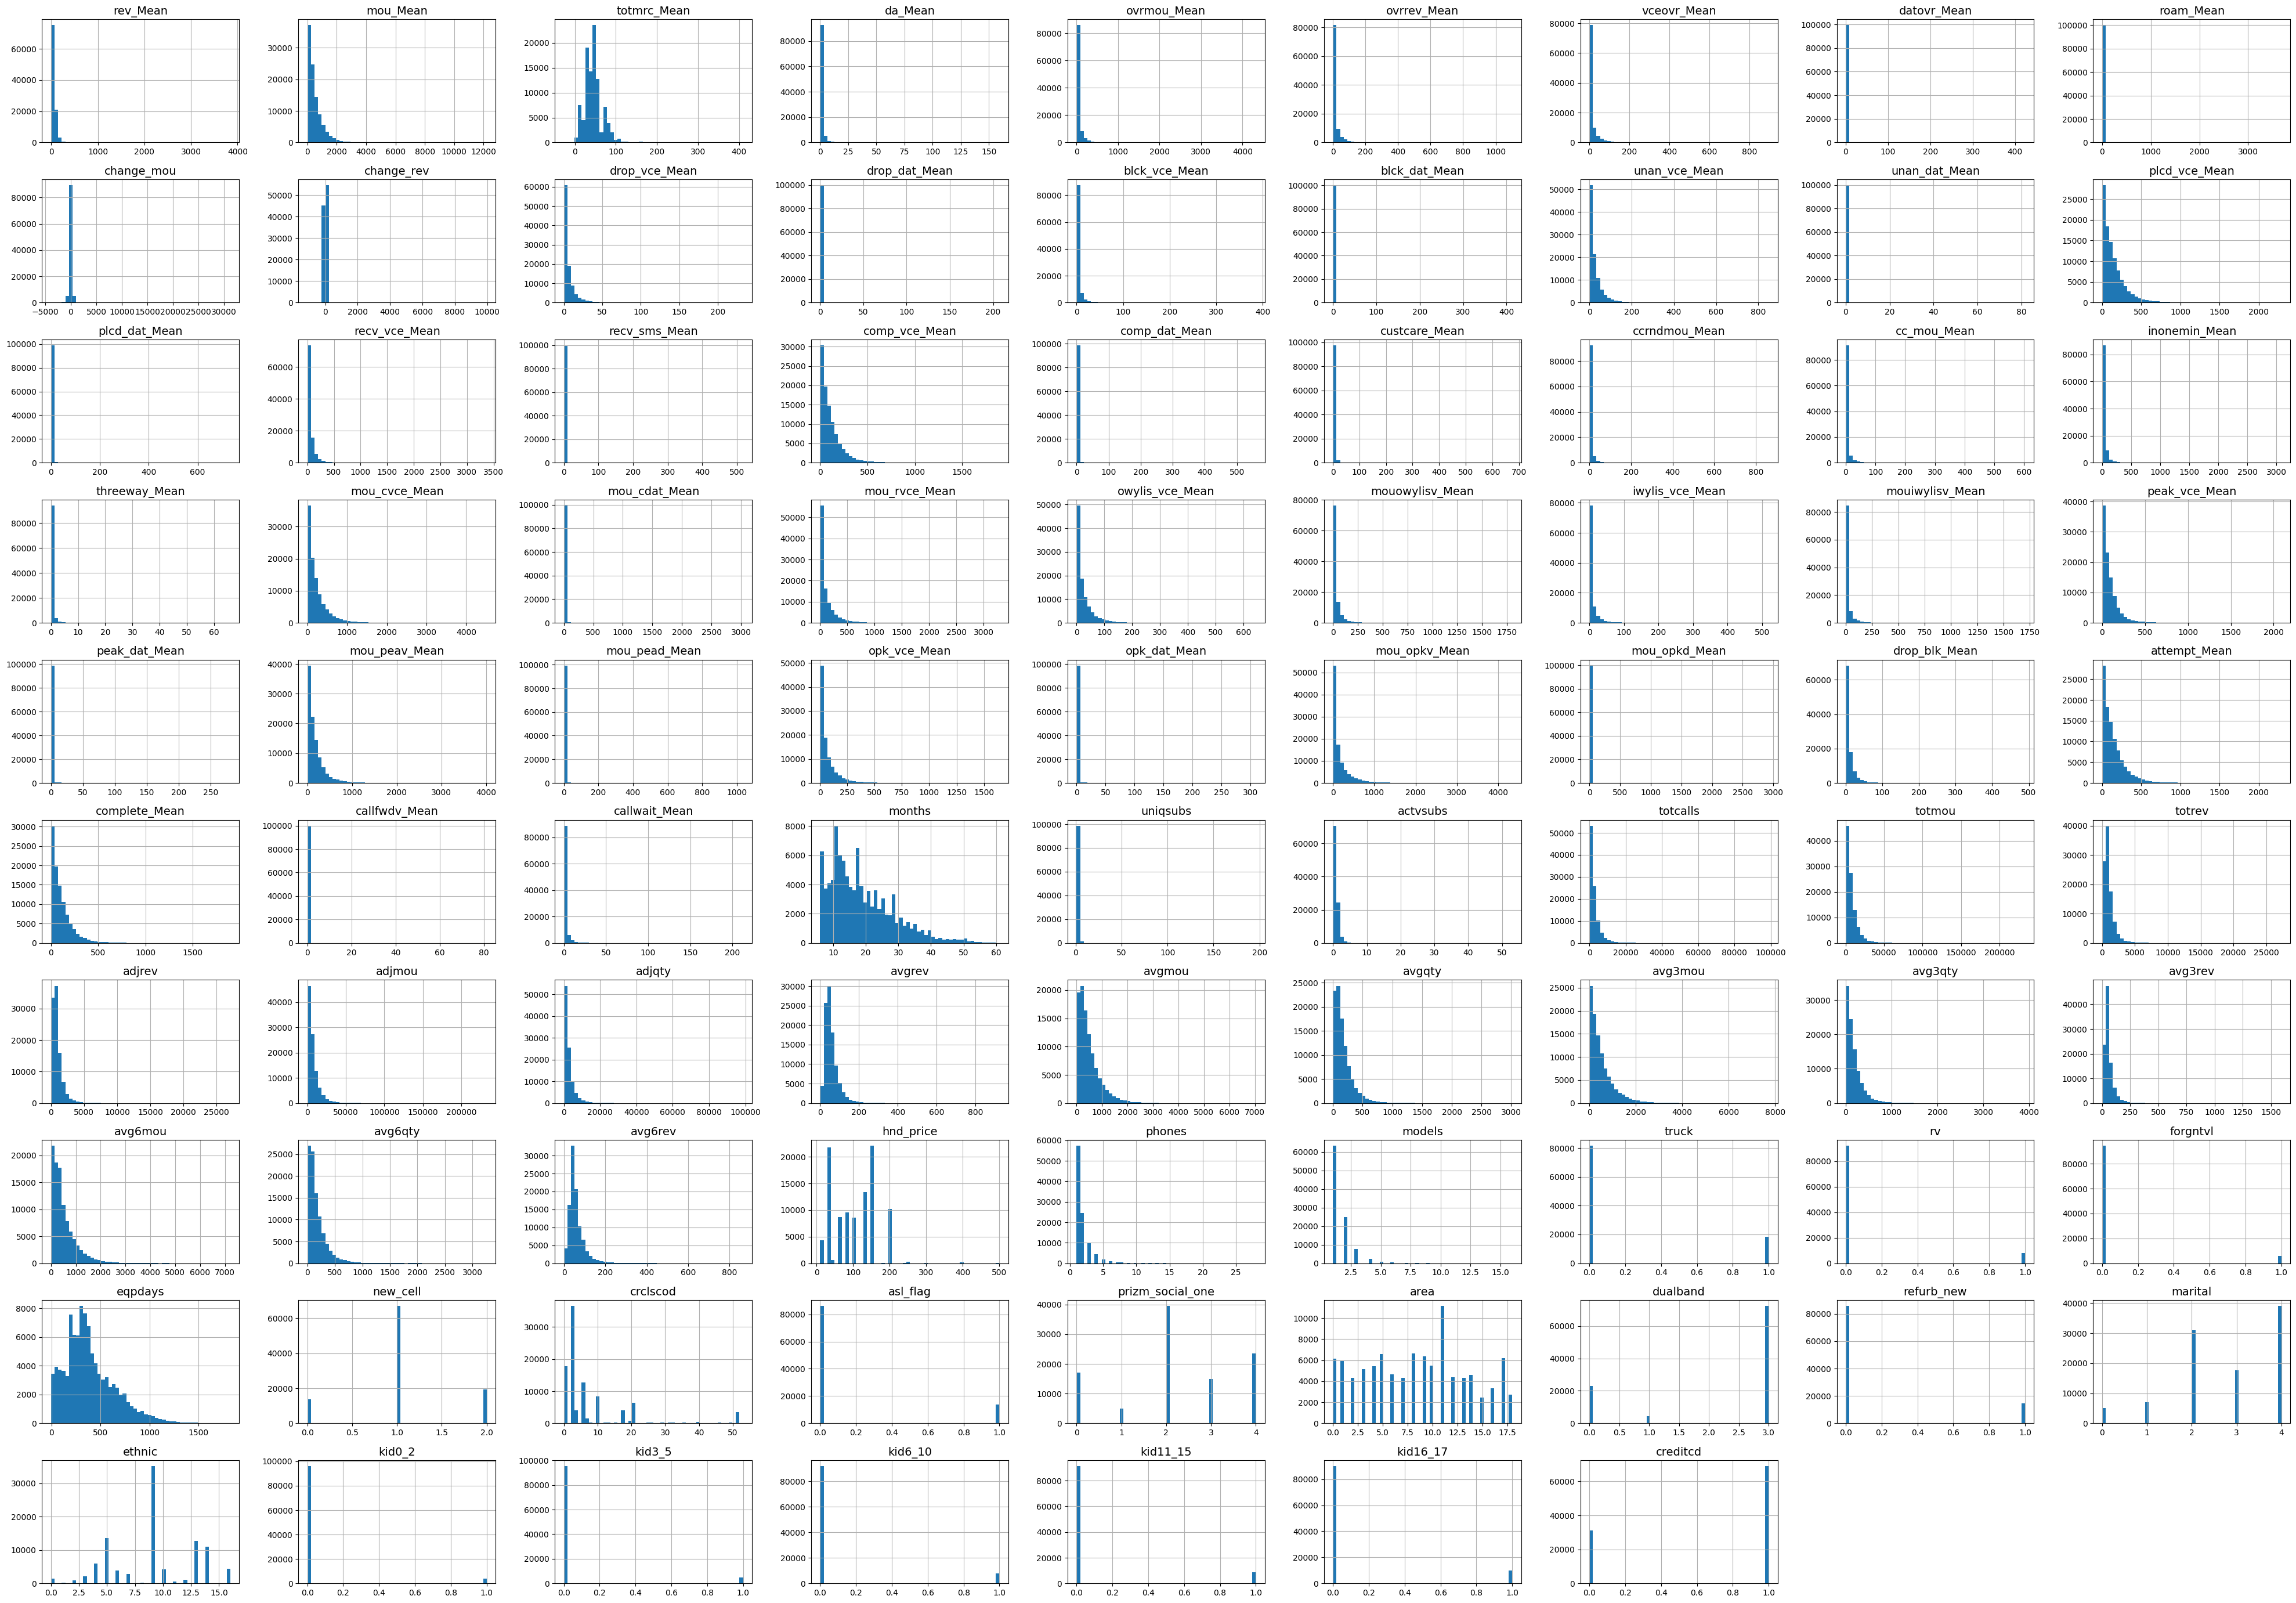

In [24]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

predictors.hist(bins=50, figsize=(50, 35))
plt.show()

Since some variables do not follow a gaussian distribution, we do not use the standard scaler. Instead, we will use the min-max scaler to normalize all the variables having a value between 0 and 1.

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [26]:
scaled_predictors = scaler.fit_transform(predictors)
scaled_predictors_df = pd.DataFrame(scaled_predictors, columns=predictors.columns)
scaled_predictors_df.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,dualband,refurb_new,marital,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd
0,0.007836,0.017961,0.113102,0.001553,0.000000,0.000000,0.000000,0.0,0.0,0.105936,...,1.0,0.0,0.75,0.5625,0.0,0.0,0.0,0.0,0.0,1.0
1,0.016538,0.039548,0.147263,0.001553,0.005265,0.008255,0.010155,0.0,0.0,0.125583,...,0.0,0.0,0.75,1.0000,0.0,0.0,0.0,0.0,0.0,1.0
2,0.006016,0.000840,0.100491,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.110296,...,0.0,0.0,0.50,0.5625,0.0,1.0,0.0,0.0,0.0,1.0
3,0.011474,0.000614,0.148579,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.110374,...,0.0,0.0,0.50,0.8750,1.0,0.0,0.0,0.0,0.0,1.0
4,0.015950,0.046736,0.226354,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.111514,...,1.0,0.0,0.75,0.3750,0.0,0.0,0.0,0.0,0.0,1.0


In [27]:
data['churn'].isnull().values.any()

False

# **Splitting the Data into Train and Test Sets**

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_predictors_df, y, test_size=0.30, random_state=0)

# **Defining a Feed Forward Neural Network**

In [29]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
!pip install torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
import torch
import torch.nn as nn
import torch.optim as optim

In [32]:
class FNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(FNN, self).__init__()
    self.hidden = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.output = nn.Linear(hidden_size, output_size)

  def forward(self, x):
    x = self.hidden(x)
    x = self.relu(x)
    x = self.output(x)
    return x

In [33]:
X_train = torch.Tensor(X_train.values)
X_test = torch.Tensor(X_test.values)
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

In [34]:
input_size = X_train.shape[1]
hidden_size = 22
output_size = 2
num_epochs = 20

In [35]:
model = FNN(input_size, hidden_size, output_size)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# **Training the Model**

In [36]:
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = loss_function(outputs, y_train.view(-1))
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()

    # Update weights
    optimizer.step()

# **Evaluating the Model**

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set the model to evaluation mode
model.eval()

# Forward pass on the test set
with torch.no_grad():
    test_outputs = model(X_test)
    _, predicted_labels = torch.max(test_outputs, 1)

# Convert predicted labels and ground truth labels to numpy arrays
predicted_labels = predicted_labels.numpy()

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.5057
Precision: 0.5000
Recall: 0.0001
F1 Score: 0.0003


# **Experiments**

# Changing the Activation Function to Sigmoid

In [38]:
class FNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(FNN, self).__init__()
    self.hidden = nn.Linear(input_size, hidden_size)
    self.sigmoid = nn.Sigmoid()
    self.output = nn.Linear(hidden_size, output_size)

  def forward(self, x):
    x = self.hidden(x)
    x = self.sigmoid(x)
    x = self.output(x)
    return x

In [39]:
input_size = X_train.shape[1]
hidden_size = 22
output_size = 2
num_epochs = 20

In [40]:
model = FNN(input_size, hidden_size, output_size)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [41]:
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = loss_function(outputs, y_train.view(-1))
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()

    # Update weights
    optimizer.step()

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set the model to evaluation mode
model.eval()

# Forward pass on the test set
with torch.no_grad():
    test_outputs = model(X_test)
    _, predicted_labels = torch.max(test_outputs, 1)

# Convert predicted labels and ground truth labels to numpy arrays
predicted_labels = predicted_labels.numpy()

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.4943
Precision: 0.4943
Recall: 1.0000
F1 Score: 0.6616


# Changing the Activation Function to Leaky ReLU

In [43]:
class FNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(FNN, self).__init__()
    self.hidden = nn.Linear(input_size, hidden_size)
    self.leakyrelu = nn.LeakyReLU(0.01)
    self.output = nn.Linear(hidden_size, output_size)

  def forward(self, x):
    x = self.hidden(x)
    x = self.leakyrelu(x)
    x = self.output(x)
    return x

In [44]:
input_size = X_train.shape[1]
hidden_size = 22
output_size = 2
num_epochs = 20

In [45]:
model = FNN(input_size, hidden_size, output_size)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [46]:
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = loss_function(outputs, y_train.view(-1))
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()

    # Update weights
    optimizer.step()

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set the model to evaluation mode
model.eval()

# Forward pass on the test set
with torch.no_grad():
    test_outputs = model(X_test)
    _, predicted_labels = torch.max(test_outputs, 1)

# Convert predicted labels and ground truth labels to numpy arrays
predicted_labels = predicted_labels.numpy()

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.5140
Precision: 0.5397
Recall: 0.1142
F1 Score: 0.1886


# Decreasing the Learning Rate (Sigmoid Activation Function)

In [48]:
class FNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(FNN, self).__init__()
    self.hidden = nn.Linear(input_size, hidden_size)
    self.sigmoid = nn.Sigmoid()
    self.output = nn.Linear(hidden_size, output_size)

  def forward(self, x):
    x = self.hidden(x)
    x = self.sigmoid(x)
    x = self.output(x)
    return x

In [49]:
input_size = X_train.shape[1]
hidden_size = 22
output_size = 2
num_epochs = 20

In [50]:
model = FNN(input_size, hidden_size, output_size)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.005)

In [51]:
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = loss_function(outputs, y_train.view(-1))
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()

    # Update weights
    optimizer.step()

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set the model to evaluation mode
model.eval()

# Forward pass on the test set
with torch.no_grad():
    test_outputs = model(X_test)
    _, predicted_labels = torch.max(test_outputs, 1)

# Convert predicted labels and ground truth labels to numpy arrays
predicted_labels = predicted_labels.numpy()

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.5057
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Increasing the Learning Rate (Sigmoid Activation Function)

In [53]:
class FNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(FNN, self).__init__()
    self.hidden = nn.Linear(input_size, hidden_size)
    self.sigmoid = nn.Sigmoid()
    self.output = nn.Linear(hidden_size, output_size)

  def forward(self, x):
    x = self.hidden(x)
    x = self.sigmoid(x)
    x = self.output(x)
    return x

In [54]:
input_size = X_train.shape[1]
hidden_size = 22
output_size = 2
num_epochs = 20

In [55]:
model = FNN(input_size, hidden_size, output_size)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.02)

In [56]:
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = loss_function(outputs, y_train.view(-1))
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()

    # Update weights
    optimizer.step()

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set the model to evaluation mode
model.eval()

# Forward pass on the test set
with torch.no_grad():
    test_outputs = model(X_test)
    _, predicted_labels = torch.max(test_outputs, 1)

# Convert predicted labels and ground truth labels to numpy arrays
predicted_labels = predicted_labels.numpy()

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.5057
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decreasing the Size of the Hidden Layer (Sigmoid Activation Function)

In [58]:
class FNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(FNN, self).__init__()
    self.hidden = nn.Linear(input_size, hidden_size)
    self.sigmoid = nn.Sigmoid()
    self.output = nn.Linear(hidden_size, output_size)

  def forward(self, x):
    x = self.hidden(x)
    x = self.sigmoid(x)
    x = self.output(x)
    return x

In [59]:
input_size = X_train.shape[1]
hidden_size = 11
output_size = 2
num_epochs = 20

In [60]:
model = FNN(input_size, hidden_size, output_size)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [61]:
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = loss_function(outputs, y_train.view(-1))
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()

    # Update weights
    optimizer.step()

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set the model to evaluation mode
model.eval()

# Forward pass on the test set
with torch.no_grad():
    test_outputs = model(X_test)
    _, predicted_labels = torch.max(test_outputs, 1)

# Convert predicted labels and ground truth labels to numpy arrays
predicted_labels = predicted_labels.numpy()

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.5057
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Increasing the Size of the Hidden Layer (Sigmoid Activation Function)

In [63]:
class FNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(FNN, self).__init__()
    self.hidden = nn.Linear(input_size, hidden_size)
    self.sigmoid = nn.Sigmoid()
    self.output = nn.Linear(hidden_size, output_size)

  def forward(self, x):
    x = self.hidden(x)
    x = self.sigmoid(x)
    x = self.output(x)
    return x

In [64]:
input_size = X_train.shape[1]
hidden_size = 44
output_size = 2
num_epochs = 20

In [65]:
model = FNN(input_size, hidden_size, output_size)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [66]:
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = loss_function(outputs, y_train.view(-1))
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()

    # Update weights
    optimizer.step()

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set the model to evaluation mode
model.eval()

# Forward pass on the test set
with torch.no_grad():
    test_outputs = model(X_test)
    _, predicted_labels = torch.max(test_outputs, 1)

# Convert predicted labels and ground truth labels to numpy arrays
predicted_labels = predicted_labels.numpy()

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.5066
Precision: 0.5047
Recall: 0.0988
F1 Score: 0.1652


## Decreasing the Learning Rate (Leaky ReLU Activation Function)

In [68]:
class FNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(FNN, self).__init__()
    self.hidden = nn.Linear(input_size, hidden_size)
    self.leakyrelu = nn.LeakyReLU(0.01)
    self.output = nn.Linear(hidden_size, output_size)

  def forward(self, x):
    x = self.hidden(x)
    x = self.leakyrelu(x)
    x = self.output(x)
    return x

In [69]:
input_size = X_train.shape[1]
hidden_size = 22
output_size = 2
num_epochs = 20

In [70]:
model = FNN(input_size, hidden_size, output_size)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.005)

In [71]:
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = loss_function(outputs, y_train.view(-1))
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()

    # Update weights
    optimizer.step()

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set the model to evaluation mode
model.eval()

# Forward pass on the test set
with torch.no_grad():
    test_outputs = model(X_test)
    _, predicted_labels = torch.max(test_outputs, 1)

# Convert predicted labels and ground truth labels to numpy arrays
predicted_labels = predicted_labels.numpy()

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.5049
Precision: 0.4444
Recall: 0.0070
F1 Score: 0.0138


# Increasing the Learning Rate (Leaky ReLU Activation Function)

In [73]:
class FNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(FNN, self).__init__()
    self.hidden = nn.Linear(input_size, hidden_size)
    self.leakyrelu = nn.LeakyReLU(0.01)
    self.output = nn.Linear(hidden_size, output_size)

  def forward(self, x):
    x = self.hidden(x)
    x = self.leakyrelu(x)
    x = self.output(x)
    return x

In [74]:
input_size = X_train.shape[1]
hidden_size = 22
output_size = 2
num_epochs = 20

In [75]:
model = FNN(input_size, hidden_size, output_size)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.02)

In [76]:
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = loss_function(outputs, y_train.view(-1))
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()

    # Update weights
    optimizer.step()

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set the model to evaluation mode
model.eval()

# Forward pass on the test set
with torch.no_grad():
    test_outputs = model(X_test)
    _, predicted_labels = torch.max(test_outputs, 1)

# Convert predicted labels and ground truth labels to numpy arrays
predicted_labels = predicted_labels.numpy()

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.5057
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decreasing the Size of the Hidden Layer (Leaky ReLU Activation Function)

In [78]:
class FNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(FNN, self).__init__()
    self.hidden = nn.Linear(input_size, hidden_size)
    self.leakyrelu = nn.LeakyReLU(0.01)
    self.output = nn.Linear(hidden_size, output_size)

  def forward(self, x):
    x = self.hidden(x)
    x = self.leakyrelu(x)
    x = self.output(x)
    return x

In [79]:
input_size = X_train.shape[1]
hidden_size = 11
output_size = 2
num_epochs = 20

In [80]:
model = FNN(input_size, hidden_size, output_size)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.005)

In [81]:
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = loss_function(outputs, y_train.view(-1))
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()

    # Update weights
    optimizer.step()

In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set the model to evaluation mode
model.eval()

# Forward pass on the test set
with torch.no_grad():
    test_outputs = model(X_test)
    _, predicted_labels = torch.max(test_outputs, 1)

# Convert predicted labels and ground truth labels to numpy arrays
predicted_labels = predicted_labels.numpy()

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.4943
Precision: 0.4943
Recall: 1.0000
F1 Score: 0.6616


# Increasing the Size of the Hidden Layer (Leaky ReLU Activation Function)

In [83]:
class FNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(FNN, self).__init__()
    self.hidden = nn.Linear(input_size, hidden_size)
    self.leakyrelu = nn.LeakyReLU(0.01)
    self.output = nn.Linear(hidden_size, output_size)

  def forward(self, x):
    x = self.hidden(x)
    x = self.leakyrelu(x)
    x = self.output(x)
    return x

In [84]:
input_size = X_train.shape[1]
hidden_size = 44
output_size = 2
num_epochs = 20

In [85]:
model = FNN(input_size, hidden_size, output_size)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.005)

In [86]:
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = loss_function(outputs, y_train.view(-1))
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()

    # Update weights
    optimizer.step()

In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set the model to evaluation mode
model.eval()

# Forward pass on the test set
with torch.no_grad():
    test_outputs = model(X_test)
    _, predicted_labels = torch.max(test_outputs, 1)

# Convert predicted labels and ground truth labels to numpy arrays
predicted_labels = predicted_labels.numpy()

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.5072
Precision: 0.5009
Recall: 0.7683
F1 Score: 0.6065


# Adding Another Hidden Layer (Leaky ReLU Activation Function)

In [88]:
class FNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(FNN, self).__init__()
    self.hidden1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.hidden2 = nn.Linear(hidden_size, hidden_size)  
    self.leakyrelu = nn.LeakyReLU(0.01)
    self.output = nn.Linear(hidden_size, output_size)

  def forward(self, x):
    x = self.hidden1(x)
    x = self.relu(x)
    x = self.hidden2(x)  
    x = self.leakyrelu(x)
    x = self.output(x)
    return x

In [89]:
input_size = X_train.shape[1]
hidden_size = 44
output_size = 2
num_epochs = 20

In [90]:
model = FNN(input_size, hidden_size, output_size)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.005)

In [91]:
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = loss_function(outputs, y_train.view(-1))
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()

    # Update weights
    optimizer.step()

In [92]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set the model to evaluation mode
model.eval()

# Forward pass on the test set
with torch.no_grad():
    test_outputs = model(X_test)
    _, predicted_labels = torch.max(test_outputs, 1)

# Convert predicted labels and ground truth labels to numpy arrays
predicted_labels = predicted_labels.numpy()

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.4943
Precision: 0.4943
Recall: 0.9999
F1 Score: 0.6615


# Adding One More Hidden Layer (Leaky ReLU Activation Function)

In [93]:
class FNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(FNN, self).__init__()
    self.hidden1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.hidden2 = nn.Linear(hidden_size, hidden_size)  
    self.hidden3 = nn.Linear(hidden_size, hidden_size)  
    self.leakyrelu = nn.LeakyReLU(0.01)
    self.output = nn.Linear(hidden_size, output_size)


  def forward(self, x):
    x = self.hidden1(x)
    x = self.relu(x)
    x = self.hidden2(x)  
    x = self.relu(x)
    x = self.hidden3(x)  
    x = self.leakyrelu(x)
    x = self.output(x)
    return x

In [94]:
input_size = X_train.shape[1]
hidden_size = 44
output_size = 2
num_epochs = 20

In [95]:
model = FNN(input_size, hidden_size, output_size)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.005)

In [96]:
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = loss_function(outputs, y_train.view(-1))
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()

    # Update weights
    optimizer.step()

In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set the model to evaluation mode
model.eval()

# Forward pass on the test set
with torch.no_grad():
    test_outputs = model(X_test)
    _, predicted_labels = torch.max(test_outputs, 1)

# Convert predicted labels and ground truth labels to numpy arrays
predicted_labels = predicted_labels.numpy()

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.5057
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Adding Another Hidden Layer (Sigmoid Activation Function)

In [98]:
class FNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(FNN, self).__init__()
    self.hidden1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.hidden2 = nn.Linear(hidden_size, hidden_size)  
    self.sigmoid = nn.Sigmoid()
    self.output = nn.Linear(hidden_size, output_size)


  def forward(self, x):
    x = self.hidden1(x)
    x = self.relu(x)
    x = self.hidden2(x)  
    x = self.sigmoid(x)
    x = self.output(x)
    return x

In [99]:
input_size = X_train.shape[1]
hidden_size = 44
output_size = 2
num_epochs = 20

In [100]:
model = FNN(input_size, hidden_size, output_size)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [101]:
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = loss_function(outputs, y_train.view(-1))
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()

    # Update weights
    optimizer.step()

In [102]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set the model to evaluation mode
model.eval()

# Forward pass on the test set
with torch.no_grad():
    test_outputs = model(X_test)
    _, predicted_labels = torch.max(test_outputs, 1)

# Convert predicted labels and ground truth labels to numpy arrays
predicted_labels = predicted_labels.numpy()

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.4943
Precision: 0.4943
Recall: 1.0000
F1 Score: 0.6616


# Adding One More Hidden Layer (Sigmoid Activation Function)

In [103]:
class FNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(FNN, self).__init__()
    self.hidden1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.hidden2 = nn.Linear(hidden_size, hidden_size)  
    self.hidden3 = nn.Linear(hidden_size, hidden_size)  
    self.sigmoid = nn.Sigmoid()
    self.output = nn.Linear(hidden_size, output_size)


  def forward(self, x):
    x = self.hidden1(x)
    x = self.relu(x)
    x = self.hidden2(x)  
    x = self.relu(x)
    x = self.hidden3(x)  
    x = self.sigmoid(x)
    x = self.output(x)
    return x

In [104]:
input_size = X_train.shape[1]
hidden_size = 44
output_size = 2
num_epochs = 20

In [105]:
model = FNN(input_size, hidden_size, output_size)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [106]:
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = loss_function(outputs, y_train.view(-1))
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()

    # Update weights
    optimizer.step()

In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set the model to evaluation mode
model.eval()

# Forward pass on the test set
with torch.no_grad():
    test_outputs = model(X_test)
    _, predicted_labels = torch.max(test_outputs, 1)

# Convert predicted labels and ground truth labels to numpy arrays
predicted_labels = predicted_labels.numpy()

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.4943
Precision: 0.4943
Recall: 1.0000
F1 Score: 0.6616
